## A - Simulation 

#### (Formatted and taken from Appendix of 'Muon_Lifetime_Tarkan.pdf')

After the fourth data run we worked on building a simulation in order to determine a correction factor that will improve the initial flux estimate ($Φ_{est} = 2.95$ muons $s^{−1}$) by taking into account muons that enter at a zenith angle other than zero and can hit both the top and side of the detector. Note that the intensity of muons at the ground as a function of zenith angle $θ_Z$ is:

\begin{equation}
I = I_0 \cos^2(θ_Z)
\label{A.1} \tag{A.1}
\end{equation}

where $I_0$ is a normalisation factor.


The simulation works by generating muons randomly on a 2-dimensional square emission plane (at an arbitrary height $z$) centred above the detector (cylindrical object centered at $x$,$y = 0$ representing the scintillator) with generated velocity components. The $\theta$-components of the muon velocities are generated using a Monte Carlo simulation that generates $\theta$-components based on ($\ref{A.1}$) using the Monte Carlo Von Neumann rejection technique. These muons are then fired from random positions on the 2D square plane with respective Monte Carlo simulated velocities. The simulation then detects the number of muons that have hit the top and the side of the detector in order to determine a correction factor. The correction factor is determined by:

\begin{equation}
c_{corr} = \frac{\Phi_{top}+\Phi_{side}}{\Phi_{top}}
\label{A.2} \tag{A.2}
\end{equation}

Where $\Phi_{top}$ and $\Phi_{side}$ are the respective top and side fluxes of the detector. Once a correction factor has been found, a new improved flux value can then be calculated:

\begin{equation}
\Phi_{imp} = c_{corr}\Phi_{est}
\label{A.3} \tag{A.3}
\end{equation}



The simulation detects whether a muon has hit the top or side of the detector by splitting it into equally spaced 2D slices parallel to the the $x$$y$-plane (also parallel to the 2D muon emission plane). Muons hitting the top of the detector will hit the top slice, whilst muons hitting the side of the detector will hit one of the other slices in the detector. The optimal number of slices in the detector is found by calculating the angle between detector slices $\phi(S)$, and the minimum angle of approach for a muon coming from the side of the emission plane to the detector $\theta_{min}(S)$; where both are functions of the slice number $S$. It then finds the minimum slice number for which a muon can’t go through the detector without being detected, satisfying the following equality $\phi$ < $\theta_{min}$.


One can verify whether a muon hits a slice by finding where the vector line representing the muons trajectory from the emission plane intersects the slice plane (infinitely big plane at the same height and parallel to the slice). A muon hitting the detector will then satisfy $x^2 +y^2 \leq r^2$, where $x$ and $y$ are the intersection coordinates of the vector line with the slice plane and $r$ is the radius of the detector ($r = 7.5$ as units of cm are used).

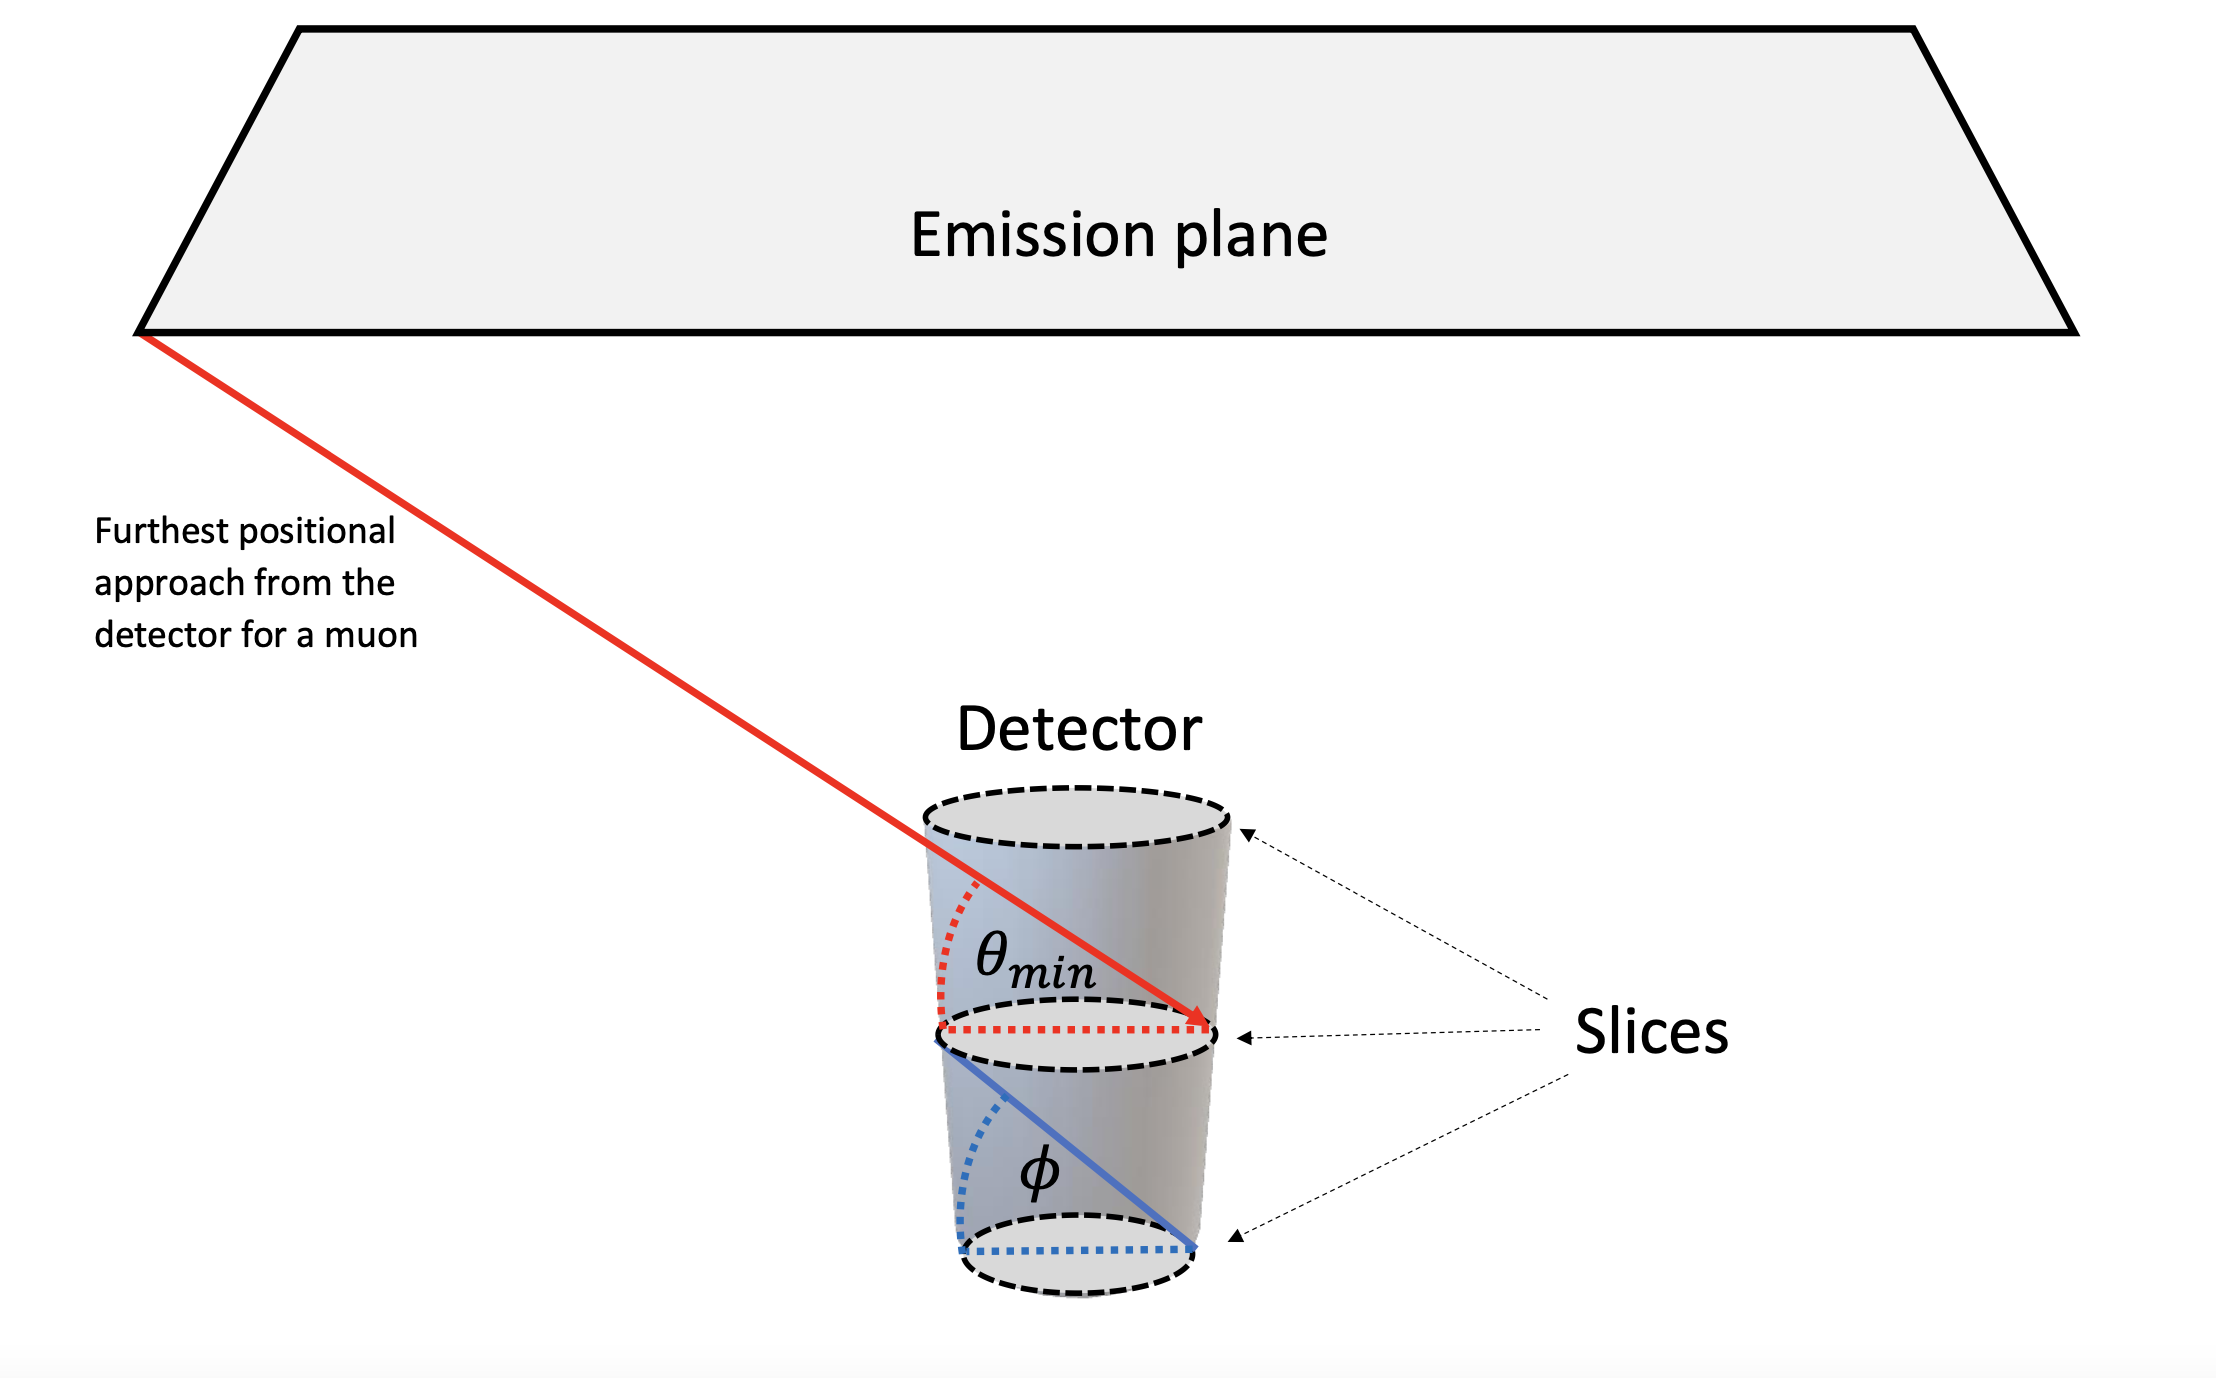

**Figure 1**: Diagram of simulation with an emission plane, detector split into equally spaced slices, and a representation of angles $\theta_{min}$ and $\phi$. In this case the number of slices would have to increase as there is a possibility that a muon emitted from the emission plane can pass through the slices undetected (as $\theta_{min} < \phi$).

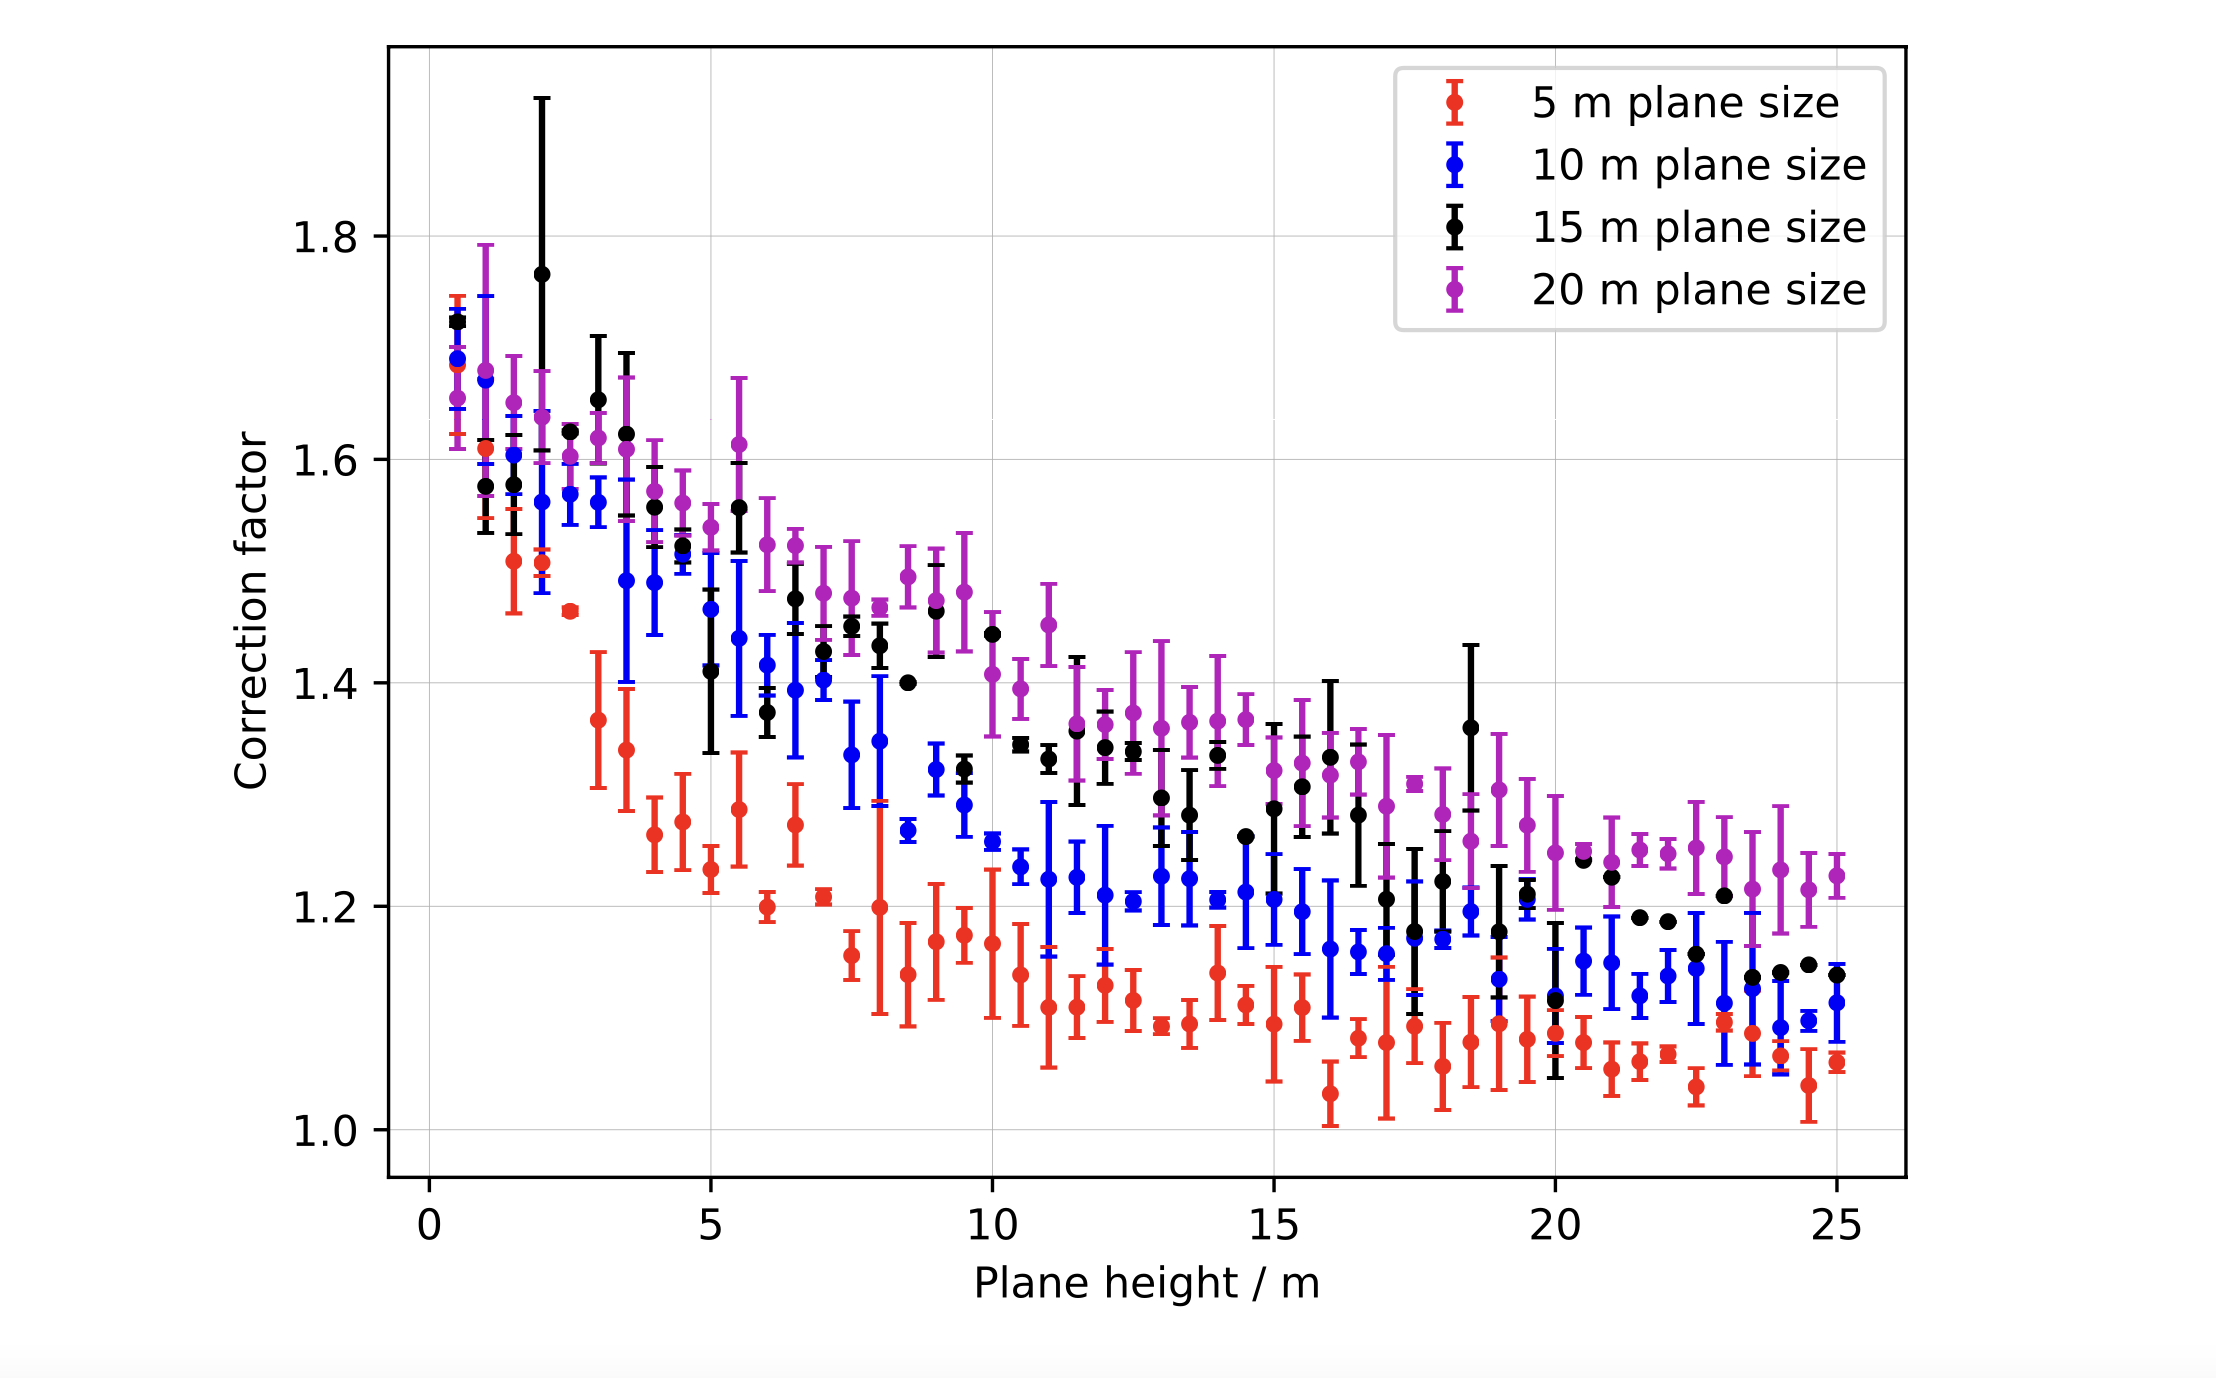

**Figure 2**: Simulation results for increasing plane sizes with varying heights. This was the first approach we took towards finding an improved muon flux $\Phi_{imp}$, which we took to be the correction factor for the 20 m plane size at the 25 m plane height. This outputs a value of $c_{corr} = 1.21 \pm 0.02$.

The first approach we took towards using the simulation was to increase the plane size with varying plane heights. We hypothesised that as the plane size increases, the correction factor will converge for big heights. In **Figure 2**, a small convergence can be seen, however bigger plane sizes would be needed in order to confirm this. For simulating the bigger plane sizes at greater heights, more muons were needed thus making the simulation longer. This is because if you run the simulation multiple times for a constant plane size and height, the top ($\Phi_{top}$) and side ($\Phi_{side}$) flux values will fluctuate due to the randomness of the muon emission coordinates and velocities, thus giving random fluctuations in the correction factor. The only way of decreasing this fluctuation or uncertainty, is to increase the number of muons being emitted thus making the simulation longer. In **Figure 2**, three simulation runs were applied to every plane size (except 15 m, where there were two runs) and the uncertainty in the correction factor was taken to be the standard deviation of the three correction factor values.

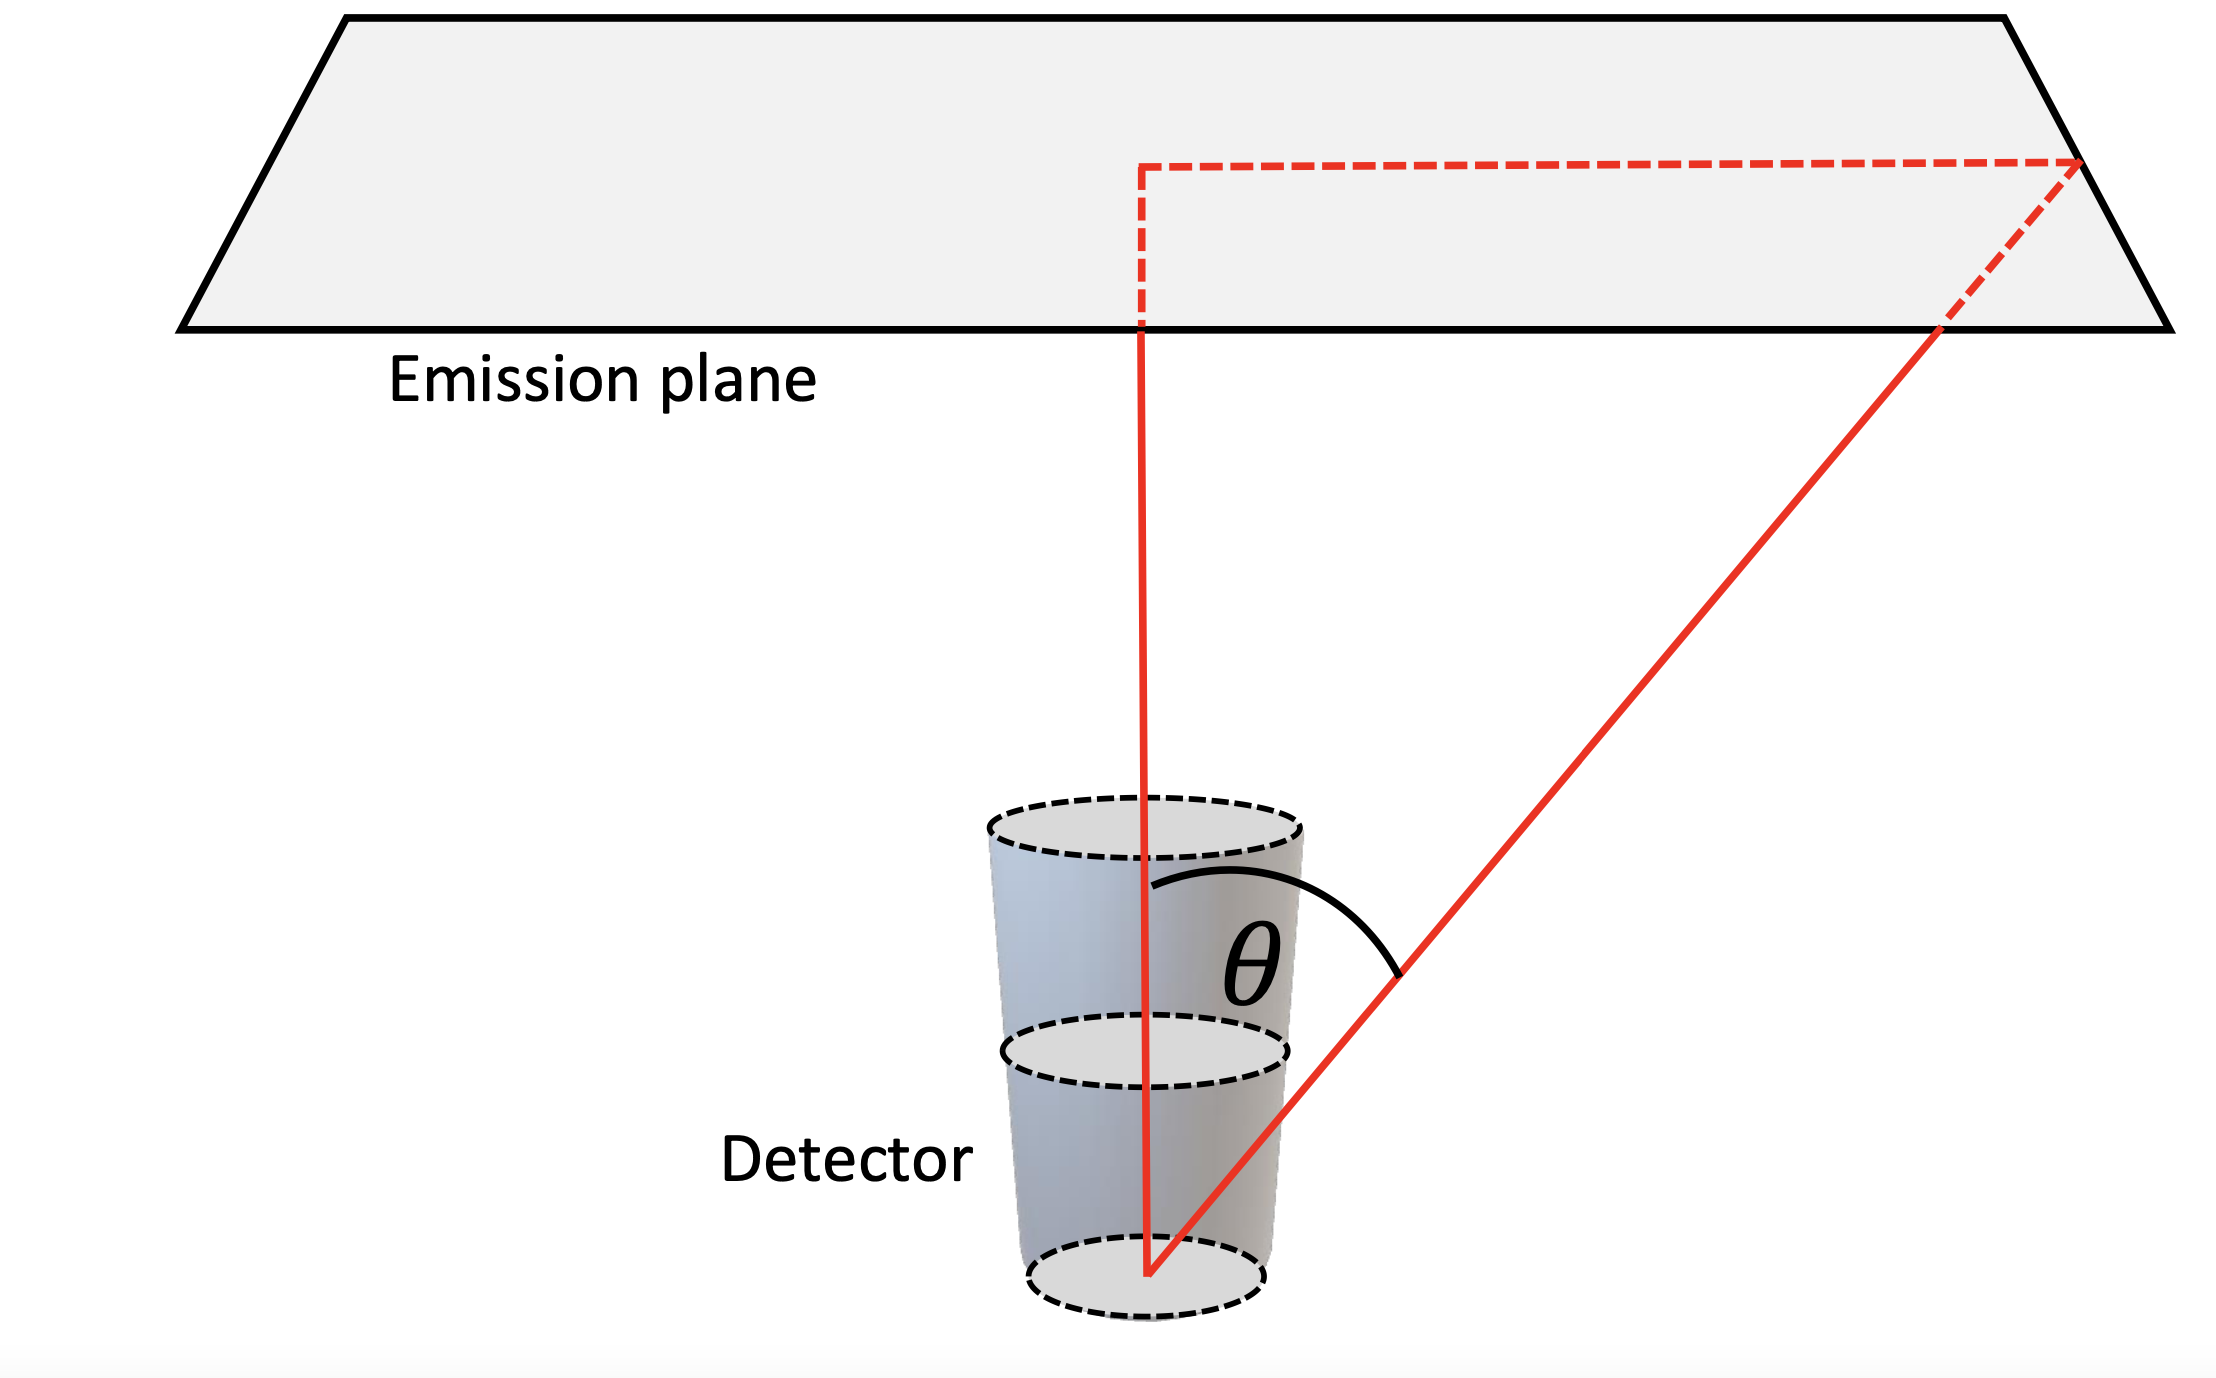

**Figure 3**: Diagram depicting the angle $\theta$ between the detector and emission plane that was used in the second approach of muon simulation in order to obtain an improved correction factor $c_{corr}$.

Towards the end of the first approach we realised that by increasing the emission plane height for varying plane sizes, we were forcing more muons to hit the top of the detector as the angle $\theta$ between the centre of the detector and the side of the emission plane (**Figure 3**) was decreasing with an increasing plane height. This meant that we were forcing the simulation to give an underestimate in the correction factor as there was going to be a greater top flux compared to the side flux. A way of fixing this would be to consider higher $\theta$ values, however that would require us going to bigger heights making the simulation longer. We had only realised this just before the fifth data run, so we decided to use this improved correction factor (using (A.3)) of $\Phi_{imp} = (3.57 \pm 0.06)$ muons $s^{−1}$ as our scintillator flux $\Phi_S$ in data run 5.

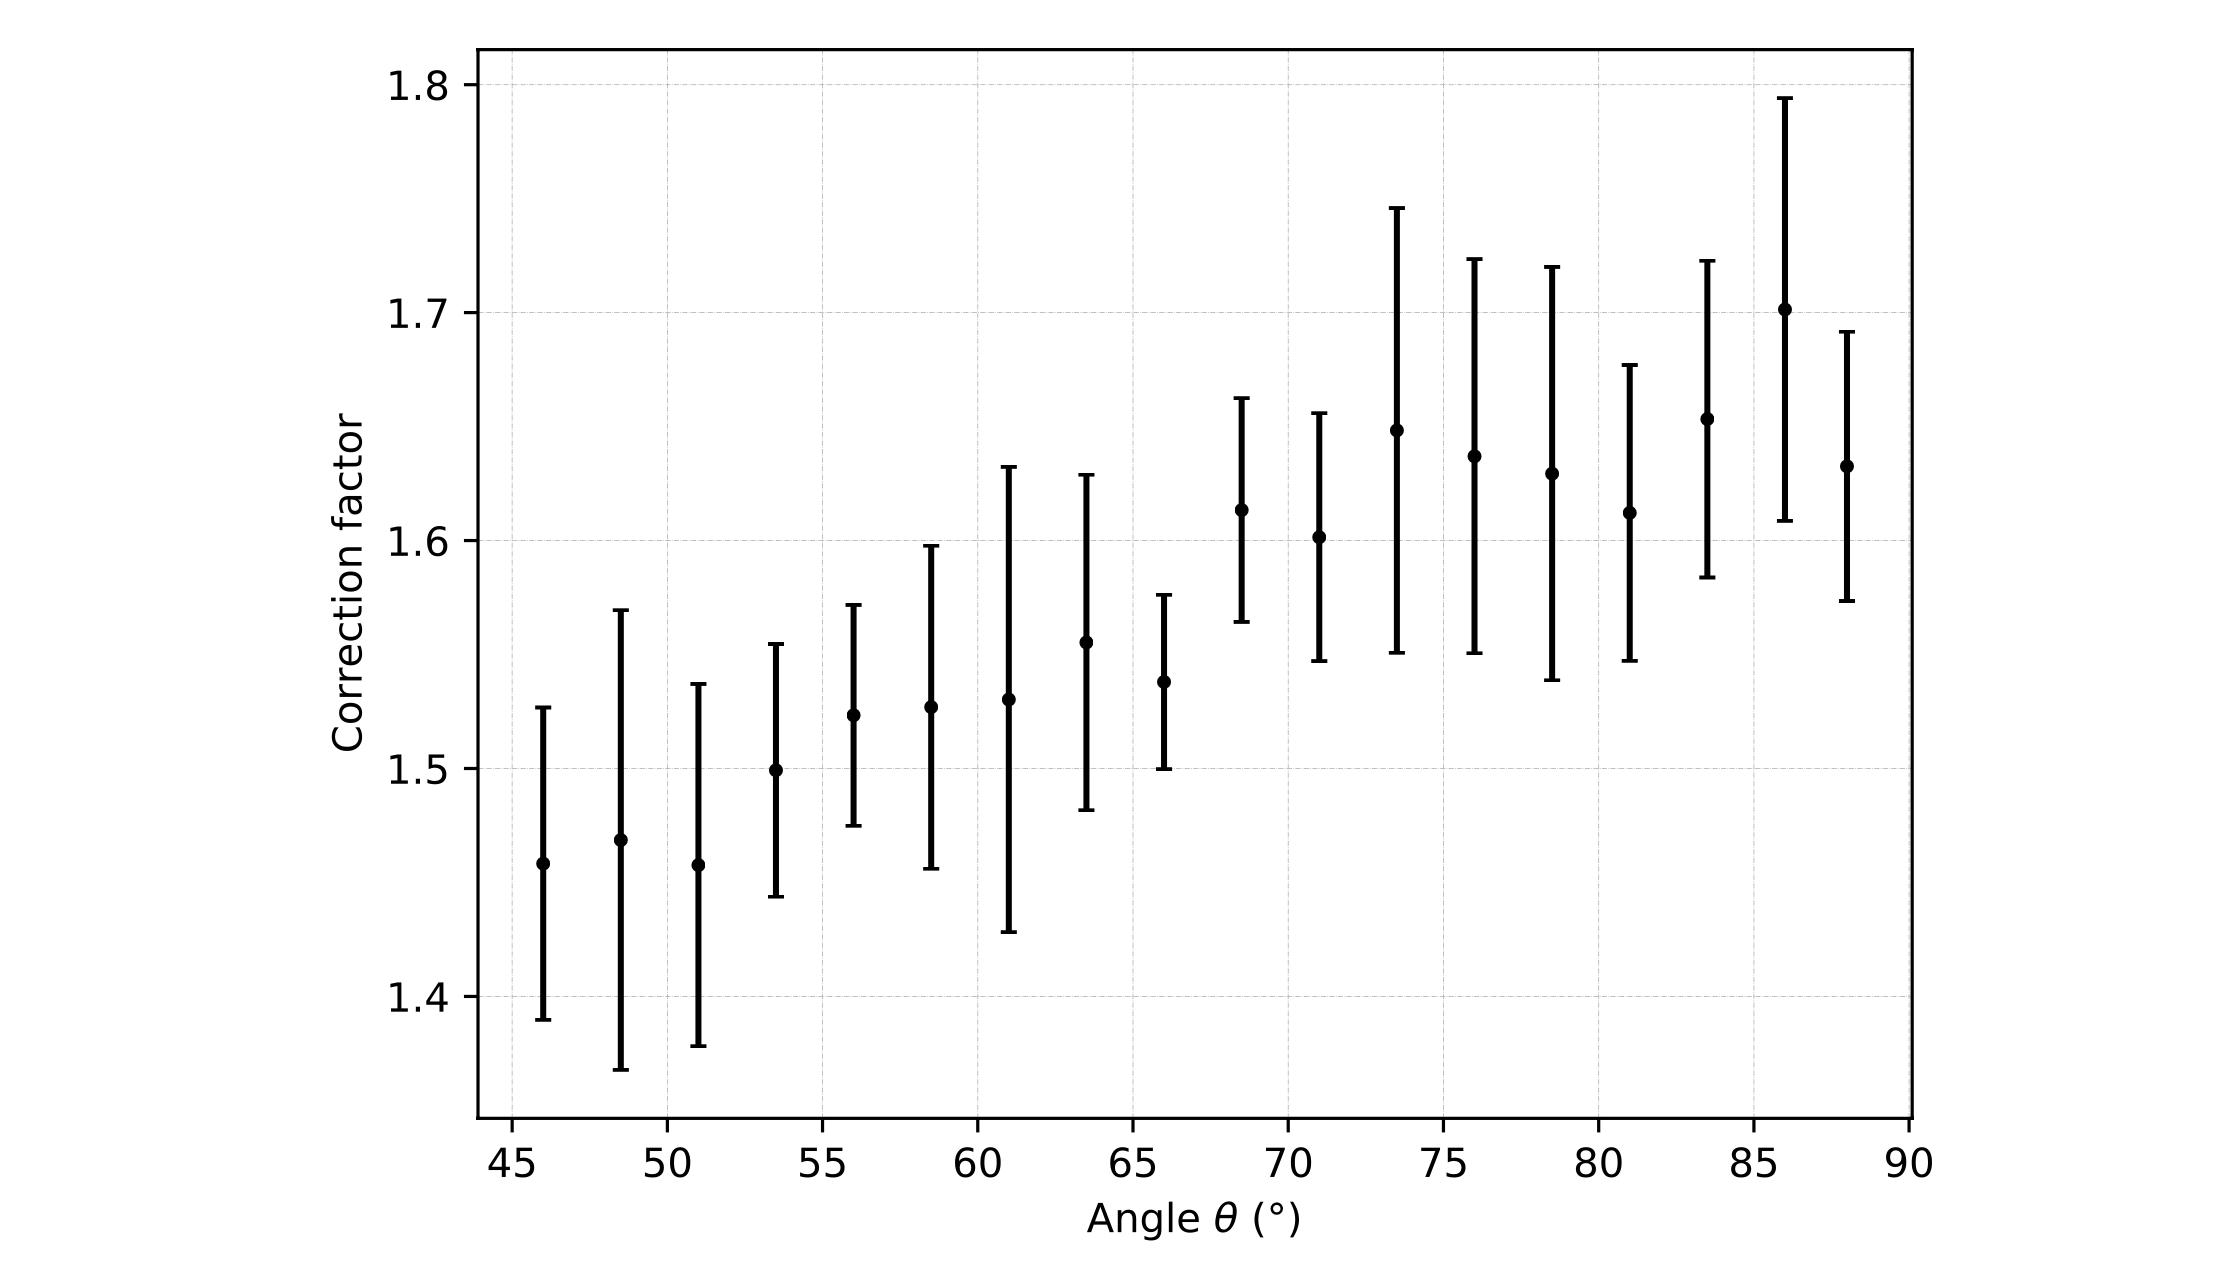

**Figure 4**: Correction factor for varying $\theta$ values in the range of 46 to 88 degrees. The plane height was kept at a constant value of 1 m.

or the second approach of the muon simulation, we considered varying angles. In this approach we hypothesised that to simulate the atmosphere as a 2D plane in a simulation, we would need the angle $\theta$ to be very large (close to 90 degrees). This is because the Earths atmosphere, although at a very large height, also has a curvature such that muons can approach the detector at angles close to 90 degrees (this event is very unlikely to occur). For each angle, 10 correction factors were determined and averaged, and the uncertainty was taken to be the standard deviation.
As can be seen in **Figure 4**, the correction factor converges for an angle that tends to a value of 90 degrees. This new correction factor is taken to be the average of the 86 and 88 degree correction factors, and outputs a value of $c_{corr} = 1.7 \pm 0.1$. This improved correction factor then outputs a value of $\Phi_{imp} = (4.9 \pm 0.3)$ muons $s^{−1}$ for improved muon flux when plugged into (A.3).

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pylab as pl
import random
from tqdm import tqdm
import math
from scipy import stats
from __future__ import print_function

### Function that finds intersection between line segment and plane
def LinePlaneCollision(planeNormal, planePoint, rayDirection, rayPoint, epsilon=1e-6):
 
	ndotu = planeNormal.dot(rayDirection)
	if abs(ndotu) < epsilon:
		raise RuntimeError("no intersection or line is within plane")
 
	w = rayPoint - planePoint
	si = -planeNormal.dot(w) / ndotu
	Psi = w + si * rayDirection + planePoint
	return Psi

# Varies size of the muon emission plane
heightplanelist = np.arange(1200,0,-100)
heightfluxvalues = []

for heightplane in tqdm(heightplanelist):
    xmin = -np.pi/2
    xmax = np.pi/2
    N = 2000000 # 2 million
  
    # Defines probability distribution function (pdf) that the Von Neumann Monte Carlo generation will follow
    def pdf(range):
        pdf_array = (np.cos(range))**2
        return pdf_array

    x=np.linspace(xmin,xmax,1000)

    pmin=0
    pmax=1

    naccept=0  
    ntrial=0

    # Von Neumann Monte Carlo generation
    ran=[]
    while naccept<N:
    
        x=np.random.uniform(xmin,xmax) # x'  
        y=np.random.uniform(pmin,pmax) # y'
    
        if y<pdf(x):
            ran.append(x)  
            naccept=naccept+1
        ntrial=ntrial+1
        
    ran=np.asarray(ran)
    
    ### Constraints for plane where muons are emitted
    ###
    size = 2000 # 20 m
    xplanemin = -size/2
    xplanemax = size/2
    yplanemin = -size/2
    yplanemax = size/2
    height = 12.5 # height of detector
    radius = 7.5 # radius of detector
    ###

    ### Generating N points on plane for muon to be emitted at
    xyplane = []
    for i in range(0,N):
        xyplane.append([np.random.uniform(xplanemin,xplanemax),np.random.uniform(yplanemin,yplanemax),heightplane])
        
    ### Muon momentum, need to calculate unit vector of muon emission
    ### r = 1
    ### x = sin(theta) cos(phi)
    ### y = sin(theta) sin(phi)
    ### z = cos(theta)
    ptheta = ran

    # Generating random phi momenta for each theta momentum value
    pphi = []
    for i in range(0,N):
        pphi.append(np.random.uniform(0,2*np.pi))

    # Now the unit vector can be calculated in cartesian coordinates
    px = np.sin(ptheta) * np.cos(pphi)
    py = np.sin(ptheta) * np.sin(pphi)
    pz = -np.cos(ptheta)

    # Creates nested array containing unit vectors
    unitv = []
    for i in range(0,N):
        unitv.append([px[i],py[i],pz[i]])
        
    ### Number of planes we are considering from z=0 -> z=h (h is height of detector)
    ### Code that selects optimum number of planes so that all muons will be detected
    ###
    for n in range(2,1001):
        thetar = math.atan((heightplane - (n-1)/n * height)/(xplanemax + radius))

        thetad = thetar*180/np.pi

        phir = math.atan(height/(2*radius*n))

        phid = phir*180/np.pi

        if phid<thetad:
            planenumber = n
            break
    ###
    planeheight = np.arange(height,0-(height/planenumber),-(height/planenumber))

    # Sets initial flux values to zero
    topflux = 0
    sideflux = 0

    planepointarray = []

    for i in planeheight: # For each plane
        # Define plane
        planenormal = np.array([0, 0, 1])
        planepoint = np.array([0, 0, i]) #Any point on the plane
        planepointarray.append(planepoint)
        unitv_temp=[]
        xyplane_temp=[]

        for j in range(0,len(unitv)): # For each ray

            # Define ray
            raydirection = np.array(unitv[j])
            raypoint = np.array(xyplane[j])

            # Calculates intercept between muon and xy plane at selected height
            intercept = LinePlaneCollision(planenormal, planepoint, raydirection, raypoint)

            # Determines whether the muon has hit the inside of the detector (or top for first plane)
            if intercept[0]**2 + intercept[1]**2 <= radius**2:

                # Appends flux values
                if i == 12.5:
                    topflux = topflux + 1
                else:
                    sideflux = sideflux + 1
	    
	    # Ignores muon trajectories that travel radially outward (where intercept radius > emission radius),
	    # and aren't within the detectors radius (defined by if statement above) to increase efficiency of simulation.
	    # These trajectories will never hit the detector (centered at r=0)
	    elif intercept[0]**2 + intercept[1]**2 > xyplane[j][0]**2 + xyplane[j][1]**2:
	    	pass
	    
            # Adds unit vectors and plane point pairs for muons that didn't hit the detector at the
            # selected height and removes muon that did hit it to not double count.
            else:
                unitv_temp.append(unitv[j])
                xyplane_temp.append(xyplane[j])

        # Updates next array of unit vector and plane point pairs for the next xy plane
        unitv = unitv_temp
        xyplane = xyplane_temp
        
    heightfluxvalues.append([topflux,sideflux])
    print("For plane height =",heightplane/100,"m , number of muons =",N)
    print([topflux,sideflux])